# *Title:* The Neurological Tap Test.

**Author:** Produced by :Fernando Cisneros

**Date Produced:** 2024/09/15

# 1. INTRODUCTION. 

This post is about testing the newest AI model, ChatGPT 01-Preview, to create a tap test similar to the one at skill-test.net.



# 2. EXECUTIVE SUMMARY.  

The claim is that ChatGPT4o is 87% accurate. Today, ChatGPT's newest AI Model is available for testing.


# 3. BUSINESS GOAL. 

Have ChatGPT4o write code to create the finger tap test. Do not assist it in writing the code.


# 4. BUISNESS TASKS.

Through iteration, could you improve the code by crafting the prompts accordingly?


# 5. METHODOLOGIES.

ChatGPT4o produced workable code on the first try, but it needed adjustments. Below is the final product after spending an hour modifying the prompts on ChatGPT. ChatGPT produces the entirety of the code.



In [4]:
import tkinter as tk
from tkinter import messagebox
import time

def center_window(root, width, height):
    # Get screen width and height
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()

    # Calculate position x and y coordinates
    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)
    root.geometry(f'{width}x{height}+{x}+{y}')

def run_test():
    tap_count = 0
    start_time = None
    test_active = False
    last_tap_time = None
    inactivity_duration = 2  # seconds to wait before ending the test after inactivity
    max_test_duration = 10   # maximum test duration in seconds
    test_result = None       # Initialize test_result

    def end_test():
        nonlocal tap_count, start_time, test_active, test_result
        test_active = False
        elapsed_time = time.time() - start_time
        taps_per_minute = (tap_count / elapsed_time) * 60
        test_result = {
            'tap_count': tap_count,
            'elapsed_time': elapsed_time,
            'taps_per_minute': taps_per_minute
        }
        root.destroy()  # Close the window

    def end_test_due_to_time():
        if test_active:
            end_test()

    def tap(event):
        nonlocal tap_count, test_active, start_time, last_tap_time
        if event.keysym == 'space':
            current_time = time.time()
            if not test_active:
                # Start the test
                test_active = True
                start_time = current_time
                last_tap_time = current_time
                check_inactivity()
                timer_label.config(text="Test is running...")
                result_label.config(text="")
                # Schedule the test to end after max_test_duration
                root.after(int(max_test_duration * 1000), end_test_due_to_time)
            elif test_active:
                tap_count += 1
                last_tap_time = current_time

    def check_inactivity():
        nonlocal last_tap_time, test_active
        if test_active:
            current_time = time.time()
            if current_time - last_tap_time >= inactivity_duration:
                end_test()
            else:
                # Check again after 100ms
                root.after(100, check_inactivity)

    # Create the main window
    root = tk.Tk()
    root.title("Index Finger Speed Tap Test")

    # Set the window size
    window_width = 800
    window_height = 600

    # Center the window
    center_window(root, window_width, window_height)

    # Bring the window to the front and make it active
    root.focus_force()
    root.attributes('-topmost', True)
    root.after(100, root.attributes, '-topmost', False)

    # Apply custom styles
    default_font = ("Helvetica", 18)
    result_font = ("Helvetica", 20, "bold")

    root.configure(bg="#f0f0f0")  # Light grey background

    # Instructions label
    instructions = tk.Label(
        root,
        text=(
            "Press the spacebar to start the test.\n"
            "Then, keep pressing the spacebar as fast as you can for up to 10 seconds.\n"
            "The test will end when you stop pressing the spacebar or after 10 seconds.\n"
            "Use only one index finger."
        ),
        font=default_font,
        bg="#f0f0f0",
        justify="center",
        wraplength=700
    )
    instructions.pack(pady=20)

    # Timer label
    timer_label = tk.Label(root, text="Press spacebar to start", font=default_font, bg="#f0f0f0")
    timer_label.pack(pady=10)

    # Result label
    result_label = tk.Label(root, text="", font=result_font, bg="#f0f0f0", fg="#333333")
    result_label.pack(pady=20)

    # Bind the spacebar key to the tap function
    root.bind('<KeyPress-space>', tap)

    root.mainloop()

    # After mainloop exits, return the test_result
    return test_result

def main():
    while True:
        test_result = run_test()
        if test_result is None:
            break  # If test_result is None, exit

        # Create a new root window to display message boxes
        root = tk.Tk()
        root.withdraw()  # Hide the root window

        # Display the results
        result_text = (
            f"You tapped {test_result['tap_count']} times in {test_result['elapsed_time']:.2f} seconds.\n"
            f"Taps per minute: {test_result['taps_per_minute']:.2f}"
        )
        messagebox.showinfo("Test Completed", result_text)

        # Ask if the user wants to repeat the test
        repeat = messagebox.askyesno("Repeat Test", "Do you want to repeat the test?")
        root.destroy()  # Close the root window for message boxes

        if not repeat:
            root = tk.Tk()
            root.withdraw()
            messagebox.showinfo("Goodbye", "Thank you for participating in the test.")
            root.destroy()
            break  # Exit the loop to end the program

if __name__ == "__main__":
    main()


# 6. CONCLUSION.

The code works, even though the output needs eye appeal. However, ChatGPT4o does appear to work better than its predicessor. The need for people to understand how to use AI responsibly continues to grow as it threatens the livelyhoods of the same peope its helping. 

# 7. INDEX.

Place your finger in the area of your age group. Move up until you select the correct line (left hand or right hand). Then, move to the left to identify your neurological age according to this graph and test. 

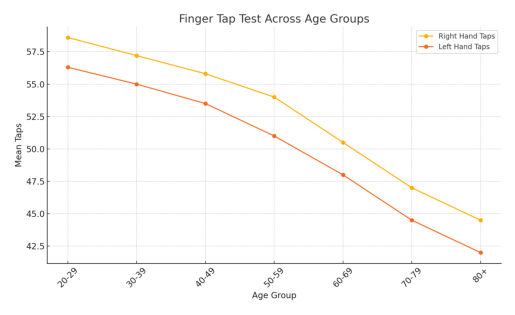

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from your Jupyter directory
image = mpimg.imread('FingerTapTest.png')  # Ensure the correct path to your image

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis labels
plt.show()

